## import

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# To embed plots in the notebooks
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np # numpy library
import scipy . linalg as lng # linear algebra from scipy library
from scipy . spatial import distance # load distance function
from sklearn import preprocessing as preproc # load preprocessing function

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

## Load dataset

In [15]:
diabetPath = './DiabetesDataNormalized.txt'
T = np.loadtxt(diabetPath, delimiter = ' ', skiprows = 1)
y = T[:, 10]
X = T[:,:10]

# Get number of observations (n) and number of independent variables (p)
[n, p] = np.shape(X)

M = X

## 3 Solve the Rigde regression problem and examine Bias and Variance for Ridge:

> (a) Derive (using pen and paper) the ridge regression solution by, as you would when minimizing any differentiable analytical function, differentiating $∥{\bf y} − {\bf X}β∥_2^2 + \lambda∥β∥_2^2$ with respect to $β$, setting to zero and solving for $β$. That is, solve
$\frac{∂}{∂β} [∥y−Xβ∥_2^2+λ∥β∥_2^2]= 0$ for $β$.

> (b) Compute ridge-regression solutions for the diabetes data set for 100 values of the regularization parameter in the range $10^{−4}$ to $10^3$. Plot the solutions as a function of this parameter. In the next lecture you will learn how to choose a single parameter value which suits the problem at hand.

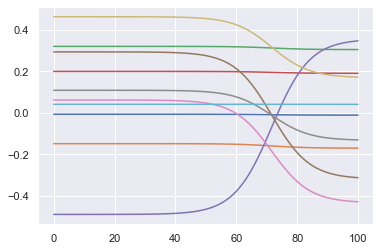

In [21]:
# Create a method that computes the betas in ridge regression
# given the design matrix, lambdas, number of independent variables
# and dependent values
def ridgeMulti(X, _lambda, p, y):
    betas = np.linalg.inv(X.T.dot(X)+_lambda).dot(X.T.dot(y))
    return betas



# make list of lambda values
lambdas = [10.0**(tmp) for tmp in np.arange(-4,3.05,7/100)]
# run ridge for all lambda values
betas = np.zeros((len(lambdas),p))
for n,l in enumerate(lambdas):
    tmp_beta = ridgeMulti(X,l,0,y)
    betas[n] = tmp_beta

for col in betas.T:
    plt.plot(col)
    
plt.show()
# plot results

> (c) Change the experiment in exercise 2 to investigate bias and variance for ridge regression instead of OLS. Can you lower the variance without introducing too much bias?

In [ ]:
# recreate the experiment from the last exercise
# you can reuse the code with some edits, and do similar plots to investigate
# the bias and variance of ridge

In [27]:
def estimate_betas(n, p, beta_true, _lambda):
    """

    Parameters:
    n (int): number of observations
    p (int): number of features
    true_betas (array): array of ture betas

    Returns:
    true_betas: the estimated betas

   """
    # Create a feature matrix either using np.random.normal or np.rand.randn
    X_rand = np.zeros((n,p))
    for i,beta in enumerate(beta_true):
        x_tmp = np.random.normal(0, scale=10, size=n)
        X_rand[:,i] = x_tmp
    
    # Create true betas
    y_true = X_rand.dot(beta_true) + np.random.normal(0, scale=sigma, size=n)

    # Estimate of beta
    beta_est = ridgeMulti(X_rand, _lambda, p, y_true)
    
    return beta_est

# define true betas, n and p, and sigma
sigma = 1
beta_true = [1,2,3]
n = 10
p = len(beta_true)
beta = estimate_betas(n, p, beta_true, sigma)
print (f'Estimated betas:{beta}')

Estimated betas:[0.97438763 1.99078717 2.96466573]


In [48]:
# call the method you just created 100 times and save the estimated betas
def beta_matrix(_lambda):
    betas = np.zeros((100,p))
    for i in range(0,100):
        betas[i] = estimate_betas(n, p, beta_true, _lambda)
    return betas

LinAlgError: Singular matrix

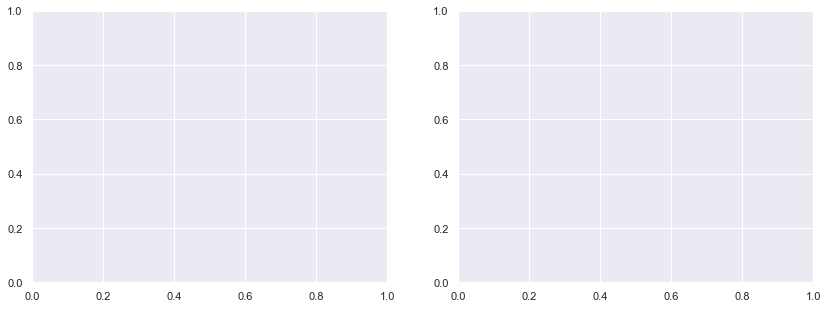

In [49]:

lambdas = [10.0**(tmp) for tmp in np.arange(-4,3.05,7/100)]

f,ax = plt.subplots(1,2,figsize=(14,5))
for l in lambdas:
    betas = beta_matrix(l)
    ax[0].bar(x=[tmp for tmp in range(len(beta_true))],height=[np.var(col) for col in betas.T],alpha=0.1)
    ax[1].plot(betas.mean(axis=0)-beta_true, marker='o')
plt.show()

In [37]:
# beta_matrix

<function __main__.beta_matrix(_lambda)>